In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm
from sklearn import decomposition
%matplotlib inline

# Importing the dataset

In [2]:
# Importing examples of red wine
df_red = pd.read_csv('data/winequality-red.csv', delimiter=';')
df_red.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Importing examples of white wine
df_white = pd.read_csv('data/winequality-white.csv', delimiter=';')
df_white.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [4]:
# Reduce data to random samples of size N
N = 1500
df_red = df_red[:N]
df_white = df_white[:N]

In [5]:
print("Red Wine:")
display(np.round(df_red.describe(), 2))
print("White Wine:")
display(np.round(df_white.describe(), 2))

Red Wine:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00
mean,8.42,0.53,0.27,2.54,0.09,15.61,46.79,1.00,3.31,0.66,10.41,5.64
std,1.74,0.18,0.20,1.40,0.05,10.46,33.25,0.00,0.16,0.17,1.08,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.20,0.39,0.10,1.90,0.07,7.00,22.00,1.00,3.20,0.55,9.50,5.00
50%,8.00,0.52,0.26,2.20,0.08,13.00,38.00,1.00,3.30,0.62,10.10,6.00
75%,9.30,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


White Wine:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00
mean,6.98,0.28,0.35,6.06,0.05,34.97,143.84,0.99,3.21,0.49,10.28,5.88
std,0.85,0.10,0.13,5.01,0.02,16.59,44.64,0.00,0.16,0.12,1.13,0.94
min,4.80,0.08,0.00,0.80,0.02,3.00,19.00,0.99,2.74,0.25,8.50,3.00
25%,6.40,0.21,0.28,1.60,0.04,23.00,113.00,0.99,3.10,0.41,9.40,5.00
50%,6.90,0.26,0.34,4.60,0.04,34.00,142.00,0.99,3.20,0.47,10.00,6.00
75%,7.40,0.33,0.41,9.60,0.05,46.00,173.00,1.00,3.31,0.55,11.00,6.00
max,10.70,0.90,1.66,22.00,0.35,131.00,366.50,1.00,3.82,0.97,14.00,9.00


In [6]:
# Get column names
column_names = list(df_red)
for i in range(len(column_names)):
    print(i, column_names[i])

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 quality


In [7]:
# Add column of zeros to red wine values
red = df_red.values
zeros = np.zeros((red.shape[0], 1))
red = np.hstack((red, zeros))

In [8]:
# Add column of ones to white wine values
white = df_white.values
ones = np.ones((white.shape[0], 1))
white = np.hstack((white, ones))

# Unsupervised Analysis

## Plotting all attributes against quality

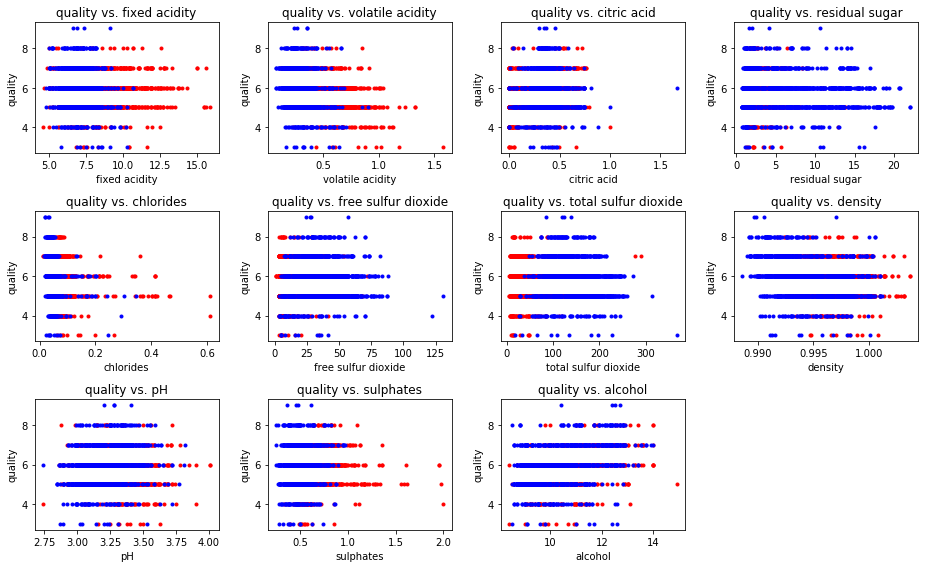

In [9]:
# Plotting all against quality

quality_index = 11

# figsize=(width, height)
plt.figure(figsize=(13, 8))

for i in range(len(column_names)):
    if i != quality_index:
        plt.subplot(3, 4, i+1)
        x_label = column_names[i]
        y_label = column_names[quality_index]
        plt.plot(red[:, i], red[:, quality_index], 'r.')
        plt.plot(white[:, i], white[:, quality_index], 'b.')
        plt.title(y_label + " vs. " + x_label)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

plt.tight_layout()
plt.show()

## Plotting all attributes against alcohol

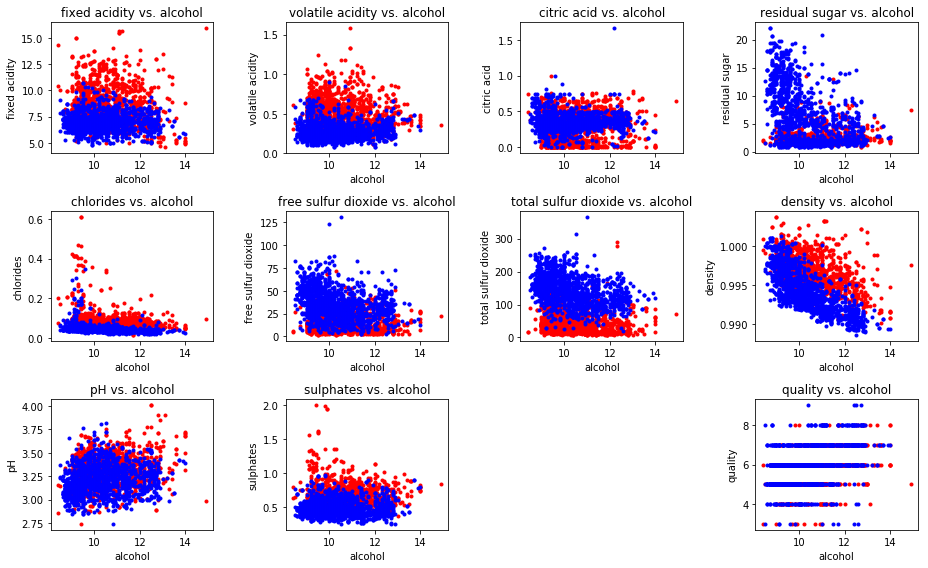

In [10]:
# Plotting all against alcohol

alcohol_index = 10

# figsize=(width, height)
plt.figure(figsize=(13, 8))

for i in range(len(column_names)):
    if i != alcohol_index:
        plt.subplot(3, 4, i+1)
        x_label = column_names[alcohol_index]
        y_label = column_names[i]
        plt.plot(red[:, alcohol_index], red[:, i], 'r.')
        plt.plot(white[:, alcohol_index], white[:, i], 'b.')
        plt.title(y_label + " vs. " + x_label)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

plt.tight_layout()
plt.show()

# Supervised Analysis

## Predicting wine type using Logistic Regression

### Data Preprocessing

In [11]:
# Separate y's from red
def preprocess(red, white, target_axis, func = "scale"):
    if (func != "scale" or func != "pca"):
        func = "scale"
    red_y = red[:, target_axis]
    red_y = np.reshape(red_y, (len(red_y), 1))
    white_y = white[:, target_axis]
    white_y = np.reshape(white_y, (len(white_y), 1))
    red_x = np.delete(red, target_axis, axis = 1) # get all columns besides the target
    white_x = np.delete(white, target_axis, axis = 1)
    # Combine red and white data into a single matrix
    x = np.vstack((red_x, white_x))
    df = pd.DataFrame(x)
    # Scale x data
    if (func == "scale"):
        x_scale = preprocessing.scale(x)
    elif (func == "pca"):
        pca = decomposition.PCA()
        x_scale = pca.fit_transform(x)
    # Combine y's from red and white into a single vector
    y = np.vstack((red_y, white_y))
    x_train, x_test, y_train, y_test = train_test_split(x_scale, y)
    return x_train, x_test, y_train, y_test

In [12]:
x_train, x_test, y_train, y_test = preprocess(red, white, 12, func ="pca")

# Using Logistic Regression

In [13]:
def runLogReg(x_train, y_train, x_test, y_test, lamb = 10000000):
    logreg = LogisticRegression(C=lamb)
    # Fixing dimensions of y_train
    y_train = np.reshape(y_train, (len(y_train), ))
    # Fitting logistic regression model to training data
    logreg.fit(x_train, y_train)
    y_hat = logreg.predict(x_test)
    # Getting accuracy of model
    tr_acc = logreg.score(x_train, y_train)
    te_acc = logreg.score(x_test, y_test)
    w = logreg.coef_
    w0 = logreg.intercept_
    prec , recal , fscore,_ = precision_recall_fscore_support(y_test, y_hat)
    return w, w0, tr_acc, te_acc, prec , recal , fscore, _

In [14]:
def get_results(x_train, y_train, x_test, y_test, Cs = [.0001, .01, 1, 100, 10000, 1000000]):
    results = dict()
    for lamVal in Cs:
        results[lamVal] = dict()
        w, w0, tr_acc, te_acc, prec , recal , fscore, _ = runLogReg(x_train, y_train, x_test, y_test, lamb = lamVal)
        results[lamVal]["w"] = w
        results[lamVal]["w0"] = w0
        results[lamVal]["tr_acc"] = tr_acc
        results[lamVal]["te_acc"] = te_acc
        results[lamVal]["prec"] = prec
        results[lamVal]["recal"] = recal
        results[lamVal]["fscore"] = fscore
    return results

'\nTODO:\n** Make tables for different values of C and the corresponding prec/recal/fscore\n'

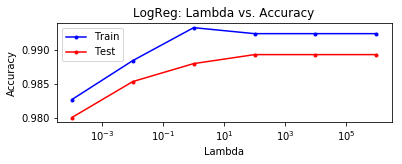

In [15]:
res = get_results(x_train, y_train, x_test, y_test)
plt.figure().add_subplot(2, 1, 1).set_xscale("log")
plt.plot(res.keys(), [res[c]["tr_acc"] for c in res.keys()], "b.-", label = "Train")
plt.plot(res.keys(), [res[c]["te_acc"] for c in res.keys()], "r.-", label = "Test" )
plt.title("LogReg: Lambda vs. Accuracy")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.legend(loc = "best")

## Predicting quality using SVM

In [16]:
x_train, x_test, y_train, y_test = preprocess(red, white, 11, func = "scale")

In [17]:
def runSVM(x_train, y_train, x_test, y_test, m_i = -1, c = 1, k = "rbf", deg = 3):
    clf = svm.SVC(C = c, kernel = k, degree = deg, max_iter = m_i)
    clf.fit(x_train, y_train)
    tr_acc = clf.score(x_train, y_train)
    te_acc = clf.score(x_test, y_test)
    y_hat = clf.predict(x_test)
    prec , recal , fscore,_ = precision_recall_fscore_support(y_test, y_hat)
    return tr_acc, te_acc, prec , recal , fscore,_

In [18]:
def getResults(kernel, Cs = [.0001, .01, 1, 100, 10000], degrees = [2, 3, 4, 5, 6], num_iters = 100000):
    results = dict()
    if (kernel != "poly"):
        """
        {
            C: {
                tr_acc:
                te_acc:
                prec:
                recall:
                fscore:
            }
        }
        """
        for C in Cs:
            results[C] = dict()
            tr_acc, te_acc, prec , recal , fscore,_ = runSVM(x_train, y_train, x_test, y_test, m_i = num_iters, c = C, k = kernel)
            results[C]["tr_acc"] = tr_acc
            results[C]["te_acc"] = te_acc
            results[C]["prec"] = prec
            results[C]["recall"] = recal
            results[C]["fscore"] = fscore
    else:
        """
        {
            degree: {
                C: {
                    acc:
                    prec:
                    recall:
                    fscore:
                }
            }
        }
        """
        for degree in degrees:
            results[degree] = dict()
            for C in Cs:
                results[degree][C] = dict()
                tr_acc, te_acc, prec , recal , fscore,_ = runSVM(x_train, y_train, x_test, y_test, m_i = num_iters, c = C, k = "poly", deg = degree)
                results[degree][C]["tr_acc"] = tr_acc
                results[degree][C]["te_acc"] = te_acc
                results[degree][C]["recall"] = recal
                results[degree][C]["fscore"] = fscore
    return results

In [19]:
TotalResults = {
                "rbf":getResults(kernel = "rbf"), 
                "poly":getResults(kernel = "poly"), 
                "linear":getResults(kernel = "linear"),
                "sigmoid":getResults(kernel = "sigmoid")
               }

/Users/jonathansassoon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonathansassoon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jonathansassoon/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/jonathansassoon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in label

/Users/jonathansassoon/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


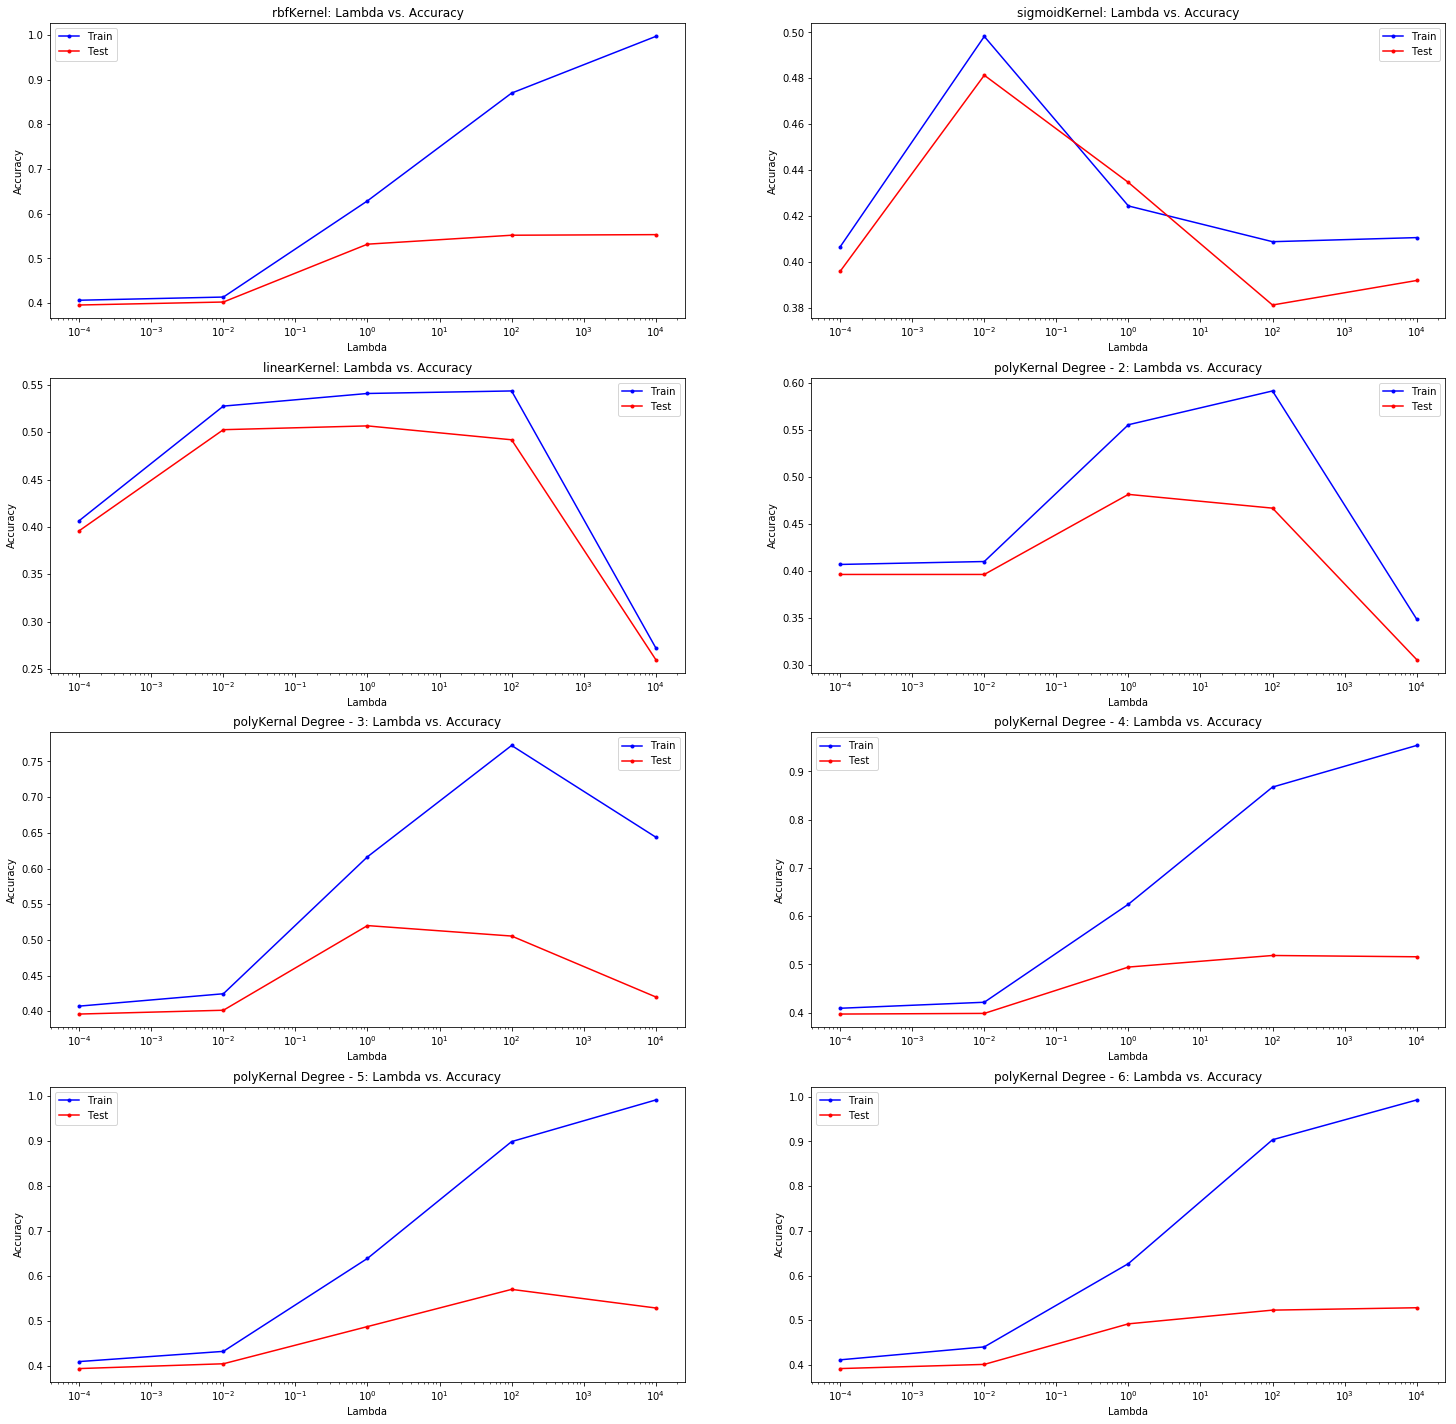

In [20]:
kernels = ["rbf", "sigmoid", "linear", "poly"]
fig_num = 0
i = 0
plt.figure(figsize=(25, 25))
for kernel in kernels:
    results = TotalResults[kernel]
    plt.subplot(4, 2, i+1).set_xscale("log")
    if (kernel != "poly"):
        Cs = results.keys()
        te_accs = [results[C]["te_acc"] for C in Cs]
        tr_accs = [results[C]["tr_acc"] for C in Cs]
        plt.plot(Cs, tr_accs, "b.-", label = "Train")
        plt.plot(Cs, te_accs, "r.-", label = "Test")
        plt.title(kernel + "Kernel: Lambda vs. Accuracy")
        plt.xlabel("Lambda")
        plt.ylabel("Accuracy")
        plt.legend(loc = "best")
        i += 1
    else:
        Cs = results[5].keys()
        degrees = results.keys()
        for deg in degrees:
            plt.subplot(4, 2, i+1).set_xscale("log")
            te_accs = [results[deg][C]["te_acc"] for C in Cs]
            tr_accs = [results[deg][C]["tr_acc"] for C in Cs]
            plt.plot(Cs, tr_accs, "b.-", label = "Train")
            plt.plot(Cs, te_accs, "r.-", label = "Test")
            plt.title("polyKernal Degree - " + str(deg) + ": Lambda vs. Accuracy")
            plt.xlabel("Lambda")
            plt.ylabel("Accuracy")
            plt.legend(loc = "best")
            i += 1

## Predicting Quality Using Neural Net

'\nTODO:\n** Neural Net\n    stuff done on HW 6:\n    ** Change number of hidden layers\n    ** Change the function\n    ** regularization term\n'

In [22]:
# Import libraries
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras import optimizers

# Clear keras session
keras.backend.clear_session()

/Users/mark/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Definitions of NN utility classes/functions

In [23]:
# Initialize sequential Neural Network model

def generate_seq_nn_model(nin, hidden_layer_dims, nout, activation='sigmoid'):
    """Creates sequential Neural Network model. 
    Params:
    nin (int): number of input neurons
    hidden_layer_dims (tup): tuple of the form (num of neurons in each hidden layer, num of hidden layers)
    nout (int): number of output neurons
    activation (str): type of activation function (defaults to sigmoid)
    """
    
    model = Sequential()
    # Add first hidden layer, setting number of input layers
    model.add(Dense(hidden_layer_dims[0], input_shape=(nin, ), activation=activation, name='hidden_1'))
    
    # Add remaining input layers
    for i in range(2, hidden_layer_dims[1]+1):   
        model.add(Dense(hidden_layer_dims[0], activation=activation, name='hidden_{}'.format(i)))
        
    # Add output layer
    model.add(Dense(nout, activation='sigmoid', name='output'))
    #print(model.summary())
    return model


In [24]:
# This class keeps track of loss history and validation accuracy. 
# An instance of this class is initialized, and passed as a 'callback' to the model being fit. 

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.train_acc = []
        self.val_acc = []
 
    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))



### Training and Testing a Basic NN

In [25]:
# Neural Network parameters

# (Number of neurons in each hidden layer, number of hidden layers)
nh = (32, 8)
# Number of input neurons
nin = x_train.shape[1]
# Number of output neurons (10 in this case, for quality ratings 1-10)
nout = 10

In [26]:
# Initialize model and history callback
model = generate_seq_nn_model(nin, nh, nout)
print(model.summary())

# Create an instance of the history callback
history_cb = LossHistory()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 32)                416       
_________________________________________________________________
hidden_2 (Dense)             (None, 32)                1056      
_________________________________________________________________
hidden_3 (Dense)             (None, 32)                1056      
_________________________________________________________________
hidden_4 (Dense)             (None, 32)                1056      
_________________________________________________________________
hidden_5 (Dense)             (None, 32)                1056      
_________________________________________________________________
hidden_6 (Dense)             (None, 32)                1056      
_________________________________________________________________
hidden_7 (Dense)             (None, 32)                1056      
__________

In [27]:
# Create optimizer for NN model, and compile model

learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Convert y's to one-hot encoding:
#1 -> [1 0 0 0 0 0 0 0 0 0], 2 -> [0 1 0 0 0 0 0 0 0 0], 10-> [0 0 0 0 0 0 0 0 0 1]
# We need to specify the number of classes there are, as not every class will be present in the dataset
# (eg. it's quite possible the sample has no rows with quality 10 or 1)

y_train_cat = keras.utils.np_utils.to_categorical(y_train, num_classes=nout)
y_test_cat = keras.utils.np_utils.to_categorical(y_test, num_classes=nout)
print(y_train_cat.shape, y_test_cat.shape)

(2250, 10) (750, 10)


In [29]:
# Batch size is the number of examples the model will run through and try to predict, 
# before calculating error and updating weights
batch_size = 100
# Epochs is the number of times we train the model over the training data
epochs = 10

In [30]:
# Fitting the model
model.fit(x_train, y_train_cat,
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(x_test, y_test_cat), 
    callbacks=[history_cb])

Train on 2250 samples, validate on 750 samples
Epoch 1/10
2250/2250 [==============================] - 1s 278us/step - loss: 0.5601 - acc: 0.7949 - val_loss: 0.4607 - val_acc: 0.9000
Epoch 2/10
2250/2250 [==============================] - 0s 29us/step - loss: 0.4028 - acc: 0.9000 - val_loss: 0.3503 - val_acc: 0.9000
Epoch 3/10
2250/2250 [==============================] - 0s 32us/step - loss: 0.3200 - acc: 0.9000 - val_loss: 0.2932 - val_acc: 0.9000
Epoch 4/10
2250/2250 [==============================] - 0s 25us/step - loss: 0.2771 - acc: 0.9000 - val_loss: 0.2634 - val_acc: 0.9000
Epoch 5/10
2250/2250 [==============================] - 0s 21us/step - loss: 0.2543 - acc: 0.9000 - val_loss: 0.2470 - val_acc: 0.9000
Epoch 6/10
2250/2250 [==============================] - 0s 22us/step - loss: 0.2413 - acc: 0.9000 - val_loss: 0.2372 - val_acc: 0.9000
Epoch 7/10
2250/2250 [==============================] - 0s 23us/step - loss: 0.2333 - acc: 0.9000 - val_loss: 0.2310 - val_acc: 0.9000
Epoch 8

### Definition of fully-funtional NN training function

In [31]:
# Function for training NN. Performs all the steps we did above. Returns history callback instance

def train_nn(x_train, y_train, x_test, y_test, hidden_layer_dims, nout, 
             learning_rate=0.001, batch_size=100, epochs=10, activation='sigmoid'):
    # Clear keras session
    keras.backend.clear_session()
    
    nin = x_train.shape[1]
    
    # Initialize model and history callback
    model = generate_seq_nn_model(nin, hidden_layer_dims, nout)

    # Create an instance of the history callback
    history_cb = LossHistory()
    
    # Create optimizer for NN model, and compile model
    opt = optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Convert y's to one-hot encoding:
    y_train_cat = keras.utils.np_utils.to_categorical(y_train, num_classes=nout)
    y_test_cat = keras.utils.np_utils.to_categorical(y_test, num_classes=nout)
    
    # Fitting the model !!!!
    # verbose=0 means that it shouldn't print output as it's training. Default is 1
    model.fit(x_train, y_train_cat,
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(x_test, y_test_cat), 
        callbacks=[history_cb], 
        verbose=0)
    
    return history_cb   

### Training NN with variable layers and var. neurons per layer

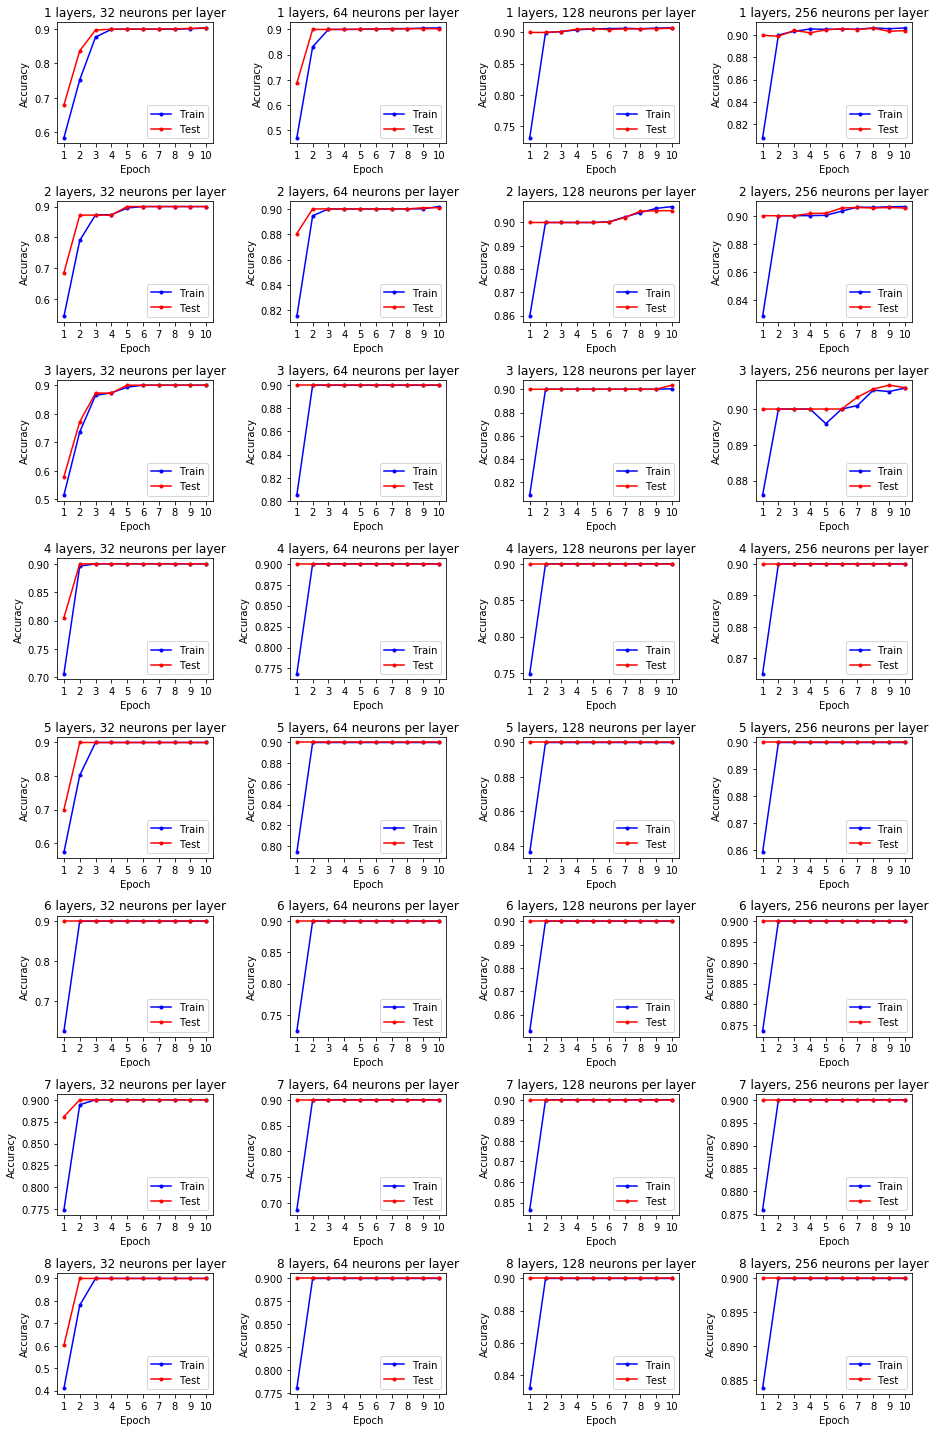

In [32]:
# Attempt to train model on (32, 64, 128, 256) neurons per layer, for (1...8) layers

# class to store data of each NN entry (no. neurons, no. layers, epoch, and accuracies)
class AccuracyEntry:
    def __init__(self, neuron_ct, layer_ct, epoch, train_acc, val_acc):
        self.neuron_ct = neuron_ct
        self.layer_ct = layer_ct
        self.epoch = epoch
        self.train_acc = train_acc
        self.val_acc = val_acc

accuracy_entries = []

neurons_per_layer = [32, 64, 128, 256]
num_layers = list(range(1, 9))

plt.figure(figsize=(13, 20))
current_plot = 1

# Plotting multiple graphs, for each combo of neurons per layer and number of layers. 
# Each value of neurons per layer is a column (4 cols), each "number of layers" is a row
# For each #_of_layers:
    # For each neurons_per_layer:
        # train model, get final accuracies
        # plot Epoch vs accuracies for each combo
        # Store accuracy entries

for layer_ct in num_layers:

    for neuron_ct in neurons_per_layer:
        hidden_layer_dims = (neuron_ct, layer_ct)
        
        # Signature of the call to train_nn():
        # train_nn(x_train, y_train, x_test, y_test, hidden_layer_dims, nout, 
        #    learning_rate=0.001, batch_size=100, epochs=10, activation='sigmoid')
        
        history = train_nn(x_train, y_train, x_test, y_test, hidden_layer_dims, nout)
        
        # Plot training and test accuracy
        plt.subplot(len(num_layers), len(neurons_per_layer), current_plot)
        plt.plot(np.arange(1, 11, 1), history.train_acc, 'b.-', label="Train")
        plt.plot(np.arange(1, 11, 1), history.val_acc, 'r.-', label="Test")
        plt.xticks(np.arange(1, 11, 1))
        plt.title(f"{layer_ct} layers, {neuron_ct} neurons per layer")
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc = "best")
        current_plot += 1
        
        # Add accuracy entries to list
        for i in range(len(history.train_acc)):
            single_nn_train_acc = history.train_acc[i]
            single_nn_val_acc = history.val_acc[i]
            accuracy_entries.append(AccuracyEntry(neuron_ct, layer_ct, i+1, single_nn_train_acc, single_nn_val_acc))
        
        
plt.tight_layout()
plt.show()

In [36]:
# Print best test accuracies
accuracy_entries.sort(key=lambda e: e.val_acc, reverse=True)

# Note: There are 320 entries for accuracy (4 options for # neurons * 8 options for # layers * 10 epochs)
num_top = 20
print("Top {} Neural Network Perfomers:\n".format(num_top))
print("\t\tVal. Acc.", "Train. Acc.", "Neuron ct.", "Layer ct.", "Epoch", sep="\t")
for i in range(num_top):
    entry = accuracy_entries[i]
    print(i+1, round(entry.val_acc, 5), round(entry.train_acc, 5), entry.neuron_ct, entry.layer_ct, entry.epoch, sep="\t\t")


Top 20 Neural Network Perfomers:

		Val. Acc.	Train. Acc.	Neuron ct.	Layer ct.	Epoch
1		0.90667		0.90489		256		3		9
2		0.90667		0.90729		128		1		10
3		0.90627		0.90653		256		1		8
4		0.90613		0.90698		128		1		9
5		0.906		0.90587		256		3		10
6		0.906		0.90569		128		1		5
7		0.90587		0.90636		256		2		9
8		0.90587		0.90613		256		2		7
9		0.90573		0.90662		128		1		7
10		0.90573		0.90538		256		1		6
11		0.9056		0.90596		128		1		8
12		0.9056		0.90529		256		3		8
13		0.90547		0.90596		256		2		8
14		0.90547		0.90653		256		2		10
15		0.90547		0.90324		256		2		6
16		0.9052		0.90418		128		1		4
17		0.90507		0.90524		256		1		7
18		0.90507		0.90684		128		2		10
19		0.90507		0.90604		128		2		9
20		0.9048		0.90529		256		1		5


In [42]:
# Export all NN data to MS Excel file
with open("nn_accuracy.xls", "w") as xlsfile:
    print("Neural Network results", file=xlsfile)
    print("", "Val. Acc.", "Train. Acc.", "Neuron ct.", "Layer ct.", "Epoch", sep="\t", file=xlsfile)
    for i in range(len(accuracy_entries)):
        entry = accuracy_entries[i]
        print(i+1, entry.val_acc, entry.train_acc, entry.neuron_ct, entry.layer_ct, entry.epoch, sep="\t", file=xlsfile)